In [1]:
import numpy as np
import os, sys
sys.path.append(os.path.expanduser(os.path.join("~", "Projects", "birkhoff")))

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import figure making stuff

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
from matplotlib.font_manager import FontProperties
import matplotlib.patches as patches
import mpl_toolkits.mplot3d.art3d as art3d

import seaborn as sns
color_names = ["windows blue",
               "red",
               "amber",
               "medium green",
               "dusty purple",
               "orange",
               "clay",
               "pink",
               "greyish",
               "light cyan",
               "steel blue",
               "forest green",
               "pastel purple",
               "mint",
               "salmon",
               "dark brown"]

colors = sns.xkcd_palette(color_names)
sns.set_style("white")
sns.set_context("paper")

from hips.plotting.colormaps import gradient_cmap
from hips.plotting.layout import create_figure, create_axis_at_location, remove_plot_labels

# Make Figure 1
A comparison of reparameterizations and their implied densities

In [3]:
fig = plt.figure(figsize=(6.65,4.75))
# 3 columns of width 2.2 left edges at [0, 2.2, 4.4]
# label pads of 0.5 mean left edges at [0.5, 2.7, 4.9] with width 1.7
# 3 rows of height 1.5. bottom edges at [3, 1.5, 0]
# label pads of 0.5 mean bottom edges at [3.5, 2.0, 0.5] with height 1.0
fp = FontProperties()
fp.set_weight("bold")


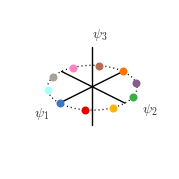

In [4]:
import birkhoff.simplex as simplex

K = 3
N = 100
rad = 2
ths = np.linspace(0, 2*np.pi, N, endpoint=False)
psis = np.column_stack((rad * np.cos(ths), 
                        rad * np.sin(ths), 
                        np.zeros_like(ths)))
pis = np.exp(psis) / np.exp(psis).sum(axis=1, keepdims=True)
xys = simplex.proj_to_2D(pis)
inds_to_plot = np.arange(0, N, step=N//10)

# Plot the points in R^K
fig = create_figure(figsize=(2.5, 2.5))
ax = create_axis_at_location(fig, 0.1, 0.1, 2.3, 2.3, projection="3d", transparent=True)
ax.plot(psis[:,0], psis[:,1], psis[:,2], ':k')

lim = 2.0
ax.plot([-lim, lim],  [0, 0],       [0, 0],      '-k')
ax.plot( [0, 0],      [-lim, lim],  [0, 0],      '-k')
ax.plot( [0, 0],      [0, 0],       [-lim, lim], '-k')

for i, ind in enumerate(inds_to_plot):
    ax.plot(psis[ind, :1], psis[ind, 1:2], psis[ind, 2:3], 
            'o', markersize=8, color=colors[i])


ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_zlim(-lim, lim)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.text(lim+1.5, 0, 0, '$\\psi_1$', fontsize=14)
ax.text(0, lim+1.0, 0, '$\\psi_2$', fontsize=14)
ax.text(0, 0, lim+0.5, '$\\psi_3$', fontsize=14)
ax.view_init(30, 45)
ax.axis('off')
fig.savefig('softmax_reals.pdf')
fig.savefig('softmax_reals.png')

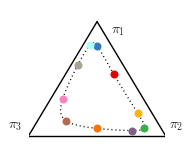

In [5]:
# Plot the points in the simplex
fig = create_figure(figsize=(2.5, 2.0), transparent=True)
ax = create_axis_at_location(fig, 0.3, 0.1, 1.9, 1.9, transparent=True)
simplex.plot_simplex(ax)

ax.plot(xys[:,0], xys[:,1], ':k')
for i, ind in enumerate(inds_to_plot):
    ax.plot(xys[ind, :1], xys[ind, 1:2], 
            'o', markersize=8, color=colors[i])
    
fig.savefig('softmax_simplex.pdf')

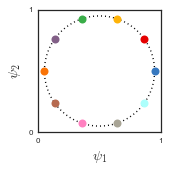

In [6]:
import birkhoff.simplex as simplex
from birkhoff.primitives import psi_to_pi

K = 3
N = 100
center = (0.5, 0.5)
rad = 0.45
ths = np.linspace(0, 2*np.pi, N, endpoint=False)
psis = np.column_stack((center[0] + rad * np.cos(ths), 
                        center[1] + rad * np.sin(ths)))
pis = np.array([psi_to_pi(psi) for psi in psis])
xys = simplex.proj_to_2D(pis)
inds_to_plot = np.arange(0, N, step=N//10)

# Plot the points in R^K
fig = create_figure(figsize=(2.5, 2.5), transparent=True)
ax = create_axis_at_location(fig, 0.5, 0.5, 1.7, 1.7, transparent=True)

square = patches.Polygon([[0, 0], [0, 1], [1, 1], [1, 0]],
                         closed=True, facecolor='w', edgecolor='none', linewidth=2)
ax.add_patch(square)

ax.plot(psis[:,0], psis[:,1], ':k')
for i, ind in enumerate(inds_to_plot):
    ax.plot(psis[ind, 0], psis[ind, 1],
            'o', markersize=8, color=colors[i])

ax.set_xlabel('$\\psi_1$', fontsize=14)
ax.set_ylabel('$\\psi_2$', fontsize=14)
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
fig.savefig("sb_square.pdf")

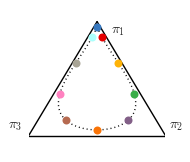

In [7]:
# Plot the points in the simplex
fig = create_figure(figsize=(2.5, 2.0), transparent=True)
ax = create_axis_at_location(fig, 0.3, 0.1, 1.9, 1.9, transparent=True)

simplex.plot_simplex(ax)

ax.plot(xys[:,0], xys[:,1], ':k')
for i, ind in enumerate(inds_to_plot):
    ax.plot(xys[ind, :1], xys[ind, 1:2], 
            'o', markersize=8, color=colors[i])
    
fig.savefig("sb_simplex.pdf")

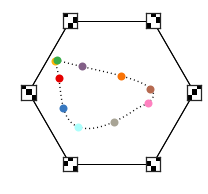

In [9]:
from birkhoff.utils import get_b3_projection, project_perm_to_sphere, sinkhorn
from birkhoff.primitives import psi_to_birkhoff, birkhoff_to_psi

K = 3
np.random.seed(1)
Q = get_b3_projection()


# For K = 3 there are only 6 permutations. Plot each of their 
# projections. 
import itertools as it
Ps = []
for perm in it.permutations(np.arange(K)):
    P = np.zeros((K, K))
    P[np.arange(K), np.array(perm)] = 1
    Ps.append(P)
Ps = np.array(Ps)
Psis = np.array([project_perm_to_sphere(P, Q) for P in Ps])
    
fig = create_figure(figsize=(2.5, 2.5), transparent=True)
ax = create_axis_at_location(fig, 0.1, 0.1, 2.3, 2.3, transparent=True)

# Plot the permutation matrices
# for i, perm in enumerate(it.permutations(np.arange(K))):
#     ax.plot(Psis[i, 0], Psis[i,1], 'ks')
    
# Get the convex hull of the points
from scipy.spatial import ConvexHull
hull = ConvexHull(Psis[:, :2])
for simplex in hull.simplices:
    for i in range(2):
        st = Psis[simplex[i]]
        en = Psis[simplex[(i+1) % 2]]
        ax.plot([st[0], en[0]], [st[1], en[1]], '-k', lw=1)
        
#  Sample a bunch of points in the Birkhoff polytope
N = 100
ths = np.linspace(0, 2*np.pi, N)
rad = 0.45
Us = np.zeros((N, K-1, K-1))
# fsin = lambda x: np.sqrt(abs(np.sin(x))) * np.sign(np.sin(x))
# fcos = lambda x: np.sqrt(abs(np.cos(x))) * np.sign(np.cos(x))
fsin = lambda x: np.sin(x)
fcos = lambda x: np.cos(x)
Us[:,0,0] = 0.5 + rad * fsin(ths)
Us[:,0,1] = 0.5 + rad * fcos(ths)
Us[:,1,0] = 0.5 + rad * fcos(ths)
# Us[:,1,0] = 0.5 
# Us[:,1,1] = 0.5 + rad * fsin(ths)
Us[:,1,1] = 0.5 
assert np.all(Us >= 0)

xys = np.zeros((N, 2))
for n in range(N):
    B = psi_to_birkhoff(Us[n])
    xys[n] = project_perm_to_sphere(B, Q)

# Plot little stencils of the permutation matrices
xlim = ax.get_xlim()
ylim = ax.get_ylim()
subw = 0.1
nx = lambda x: 2.3 * (x-xlim[0]) / (xlim[1] - xlim[0])
ny = lambda y: 2.3 * (y-ylim[0]) / (ylim[1] - ylim[0])
for i, perm in enumerate(it.permutations(np.arange(K))):
    x, y = Psis[i, 0], Psis[i, 1]
    subax = create_axis_at_location(fig, 0.1 + nx(x)-subw, 
                                    0.1 + ny(y)-subw, 
                                    2*subw, 2*subw, 
                                    ticks=False)
    subax.patch.set_color('none')
    Pi = np.zeros((K, K))
    Pi[np.arange(K), perm] = 1
    subax.imshow(Pi, interpolation="nearest")


inds_to_plot = np.arange(0, N, step=N//10)
ax.plot(xys[:,0], xys[:,1], ':k')
for i, ind in enumerate(inds_to_plot):
    ax.plot(xys[ind, :1], xys[ind, 1:2], 
            'o', markersize=8, color=colors[i])
    
ax.axis('off')
fig.savefig('sb_birkhoff.pdf')
fig.savefig('sb_birkhoff.png')


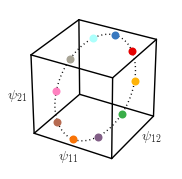

In [10]:
# Now plot the trajectory in the K-1 x K-1 unit hypercube
from birkhoff.utils import get_b3_projection, project_perm_to_sphere
K = 3
np.random.seed(0)
    
fig = create_figure(figsize=(2.5, 2.5), transparent=True)
ax = create_axis_at_location(fig, 0.1, 0.1, 2.3, 2.3, projection='3d', transparent=True)

# Axis-parallel projection
axes = (0, 1, 2)
fUs = np.reshape(Us, (-1, (K-1)**2))
ax.axis('off')

ax.plot(fUs[:,axes[0]], fUs[:, axes[1]], fUs[:, axes[2]], ':k')
for i, ind in enumerate(inds_to_plot):
    ax.plot(fUs[ind, axes[0]:axes[0]+1],
            fUs[ind, axes[1]:axes[1]+1],
            fUs[ind, axes[2]:axes[2]+1],
            'o', markersize=8, color=colors[i])
    
ax.text(0.5, -0.3, 0.,  "$\\psi_{11}$", fontsize=14)
ax.text(1.1, 0.5, 0.,   "$\\psi_{12}$", fontsize=14)
ax.text(-0.2,-0.2, 0.5, "$\\psi_{21}$", fontsize=14)
    
r = [0, 1]
for s, e in it.combinations(np.array(list(it.product(r,r,r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot(*zip(s,e), '-k')
    
fig.savefig('sb_cube.pdf')
fig.savefig('sb_cube.png')

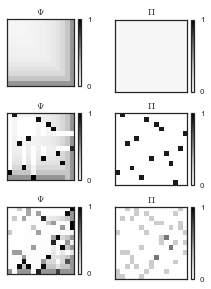

In [11]:
# What do random samples look like?
# What does the inverse of the "uniform" doubly stochastic matrix look like?
from birkhoff.primitives import birkhoff_to_psi
N = 15

def plot_pi_and_psi(Pi, Psi, fig, ax1, ax2):
    im1 = ax1.imshow(Psi, interpolation="nearest", vmin=0, vmax=1.0)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_title("$\Psi$")

    divider = make_axes_locatable(ax1)
    cb1 = divider.new_horizontal(size="5%", pad=0.05)
    fig.add_axes(cb1)
    plt.colorbar(im1, cax=cb1, ticks=[0, 1])

    im2 = ax2.imshow(Pi, interpolation="nearest", vmin=0, vmax=1)
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_title("$\Pi$")

    divider = make_axes_locatable(ax2)
    cb2 = divider.new_horizontal(size="5%", pad=0.05)
    fig.add_axes(cb2)
    plt.colorbar(im2, cax=cb2, ticks=[0, 1])

fig = plt.figure(figsize=(3.25, 4))

# First the center of the polytope
ax1 = create_axis_at_location(
    fig, 0.2, 2.6 + (1./N) * 1.1, 
    float(N-1)/N * 1.1, float(N-1)/N * 1.1)

ax2 = create_axis_at_location(
    fig, 1.7, 2.6, 1.1, 1.1)

Pi = 1./N *np.ones((N,N))
Psi = birkhoff_to_psi(Pi)
plot_pi_and_psi(Pi, Psi, fig, ax1, ax2)

def mixture_of_permutations(M, w):
    assert len(w) == M
    w = np.array(w) / np.sum(w)
    Pi = 0.1 * 1./N * np.ones((N,N))
    for m in range(M):
        Pim = np.zeros((N,N))
        Pim[np.arange(N), np.random.permutation(N)] = 1.0
        Pi += 0.9 * w[m] * Pim
    return Pi

# Now a random permutation
ax3 = create_axis_at_location(
    fig, 0.2, 1.3 + (1./N) * 1.1, 
    float(N-1)/N * 1.1, float(N-1)/N * 1.1)

ax4 = create_axis_at_location(
    fig, 1.7, 1.3, 1.1, 1.1)

Pi = mixture_of_permutations(1, [1.0])
Psi = birkhoff_to_psi(Pi)
plot_pi_and_psi(Pi, Psi, fig, ax3, ax4)

# Now a mixture of two permutations
ax5 = create_axis_at_location(
    fig, 0.2, 0. + (1./N) * 1.1, 
    float(N-1)/N * 1.1, float(N-1)/N * 1.1)

ax6 = create_axis_at_location(
    fig, 1.7, 0., 1.1, 1.1)

Pi = mixture_of_permutations(3, np.ones(3) / 3)
Psi = birkhoff_to_psi(Pi)
plot_pi_and_psi(Pi, Psi, fig, ax5, ax6)

plt.savefig("pi_psi.pdf")
plt.savefig("pi_psi.png", dpi=300)

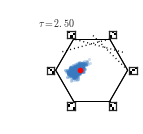

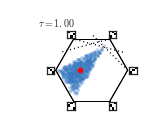

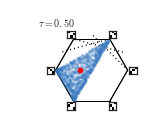

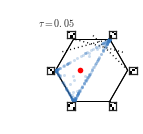

In [160]:
from birkhoff.utils import project_perm_to_sphere
from birkhoff.primitives import psi_to_birkhoff, birkhoff_to_psi, logit, logistic
np.random.seed(1)
K = 3

Q = get_b3_projection()

def permmatrix(perm):
    K = len(perm)
    P = np.zeros((K, K))
    P[np.arange(K), perm] = 1
    return P

# Create a distribution over the Birkhoff polytope
Pi1 = 1./K * np.ones((K, K))
Pi2 = permmatrix((0, 1, 2))
Pi3 = permmatrix((1, 2, 0))
Pi4 = permmatrix((1, 0, 2))
# Pi4 = permmatrix((2, 0, 1))
# Pi5 = permmatrix((2, 1, 0))
Pi_mean = 1./3 * Pi2 + 1./3 * Pi3 + 1./3 * Pi4
# Pi = 0.05 * Pi1 + 0.95/4 * Pi2 + 0.95/4 * Pi3 + 0.95/4 * Pi4 + 0.95/4 * Pi5

# Pi1 = 1./K * np.ones((K, K))
# Pi2 = np.zeros((K, K))
# Pi2[np.arange(K), [0, 1, 2]] = 1
# Pi3 = np.zeros((K, K))
# Pi3[np.arange(K), [1, 2, 0]] = 1
# Pi = 0.1 * Pi1 + 0.45 * Pi2 + 0.45 * Pi3 

Psi = birkhoff_to_psi(Pi_mean)
mu = logit(Psi)
sigma = np.ones((K-1, K-1))
# mu, sigmasq = get_mean_and_variance(K)
# sigma = np.sqrt(sigmasq)


#  Sample a bunch of points in the Birkhoff polytope
N = 1000
zs = mu + sigma * np.random.randn(N, K-1, K-1)

# Plot the samples at different temperatures
def plot_birkhoff_samples(zs, tau):
    Us = logistic(zs / tau)
    
    xys = np.zeros((N, 2))
    Bs = []
    for n in range(N):
        B = psi_to_birkhoff(Us[n])
        Bs.append(B)
        xys[n] = project_perm_to_sphere(B, Q)
        
    Bs = np.array(Bs)
    Bmin = np.min(Bs, axis=(1,2))
    Bmax = np.max(Bs, axis=(1,2))
        
    # For K = 3 there are only 6 permutations. Plot each of their 
    # projections. 
    import itertools as it
    Ps = []
    for perm in it.permutations(np.arange(K)):
        P = np.zeros((K, K))
        P[np.arange(K), np.array(perm)] = 1
        Ps.append(P)
    Ps = np.array(Ps)
    Psis = np.array([project_perm_to_sphere(P, Q) for P in Ps])

    fig = create_figure(figsize=(1.6, 1.6), transparent=True) 
    xlim = -1.75, 1.25
    ylim = -1.25, 1.75

    # First plot the convex hull
    ax = create_axis_at_location(fig, 0.05, 0.05, 1.5, 1.5, transparent=True)
    ax.axis('off')
    from scipy.spatial import ConvexHull
    hull = ConvexHull(Psis[:, :2])
    for simplex in hull.simplices:
        for i in range(2):
            st = Psis[simplex[i]]
            en = Psis[simplex[(i+1) % 2]]
            ax.plot([st[0], en[0]], [st[1], en[1]], '-k', lw=1)
            
#     for P1, Psi1 in zip(Ps, Psis):
#         for P2, Psi2 in zip(Ps, Psis):
#             if abs(P1-P2).sum() == 4:
#                 ax.plot([Psi1[0], Psi2[0]],
#                         [Psi1[1], Psi2[1]], ':k', lw=1)

    # Plot the internal edges
    for i in range(3):
        thi = i * np.pi / 6 
        thf = (i + 3) * np.pi / 6 
        ax.plot([np.cos(thi), np.cos(thf)], [np.sin(thi), np.sin(thf)], ':k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    # Then plot little stencils of the permutation matrices
    subw = 0.15
    nx = lambda x: x / (xlim[1] - xlim[0])
    ny = lambda y: y / (ylim[1] - ylim[0])
    lx = lambda x: 1.5 * nx(x-xlim[0])
    by = lambda y: 1.5 * ny(y-ylim[0])
    for i, perm in enumerate(it.permutations(np.arange(K))):
        x, y = (1.0+subw) * Psis[i, 0], (1.0+subw) * Psis[i, 1]
        subax = create_axis_at_location(fig, 
                                        0.05 + lx(x)-nx(subw), 
                                        0.05 + by(y)-ny(subw), 
                                        2*nx(subw), 2*ny(subw), 
                                        ticks=False)
        subax.patch.set_color('none')
        Pi = np.zeros((K, K))
        Pi[np.arange(K), perm] = 1
        subax.imshow(Pi, interpolation="nearest")

    
    # Finally, plot the samples
    ax3 = create_axis_at_location(fig, 0.05, 0.05, 1.5, 1.5)
    ax3.plot(xys[:,0], xys[:,1], 'o', markersize=3, alpha=0.25, color=colors[0])
    
    # Plot the mean
    xy_mean = project_perm_to_sphere(Pi_mean, Q)
    ax3.plot(xy_mean[0], xy_mean[1], 'ro')
    
    ax3.set_xlim(xlim)
    ax3.set_ylim(ylim)
    ax3.axis('off')

    ax3.text(-1.5, 1.20, "$\\tau={0:.2f}$".format(tau), fontsize=10)
    
    fig.savefig('birkhoff_samples_{0:.2f}.pdf'.format(tau))
    fig.savefig('birkhoff_samples_{0:.2f}.png'.format(tau), dpi=300)

plot_birkhoff_samples(zs, 2.5)
plot_birkhoff_samples(zs, 1.0)
plot_birkhoff_samples(zs, 0.5)
plot_birkhoff_samples(zs, 0.05)
# plot_birkhoff_samples(zs, 0.001)


In [161]:
Psis

array([[ -1.00000000e+00,   5.80004553e-16],
       [ -5.00000000e-01,   8.66025404e-01],
       [ -5.00000000e-01,  -8.66025404e-01],
       [  5.00000000e-01,   8.66025404e-01],
       [  5.00000000e-01,  -8.66025404e-01],
       [  1.00000000e+00,  -4.86438207e-16]])

In [148]:
# Figure out the effective number of subsequent entries
# that depend on the ij-th entry
import scipy.special
from scipy.integrate import simps

def get_mean_and_variance(K):
    B = np.zeros((K-1, K-1))
    for i in range(K-1):
        for j in range(K-1):
            B[i,j] = np.sum(np.arange(i+1, K-1) / (np.arange(i+1, K-1) + j))
            B[i,j] += np.sum(np.arange(j+1, K-1) / (np.arange(j+1, K-1) + i))


    def compute_psi_cmoments(alpha, beta):
        psi = np.linspace(-10,10,1000)
        density = get_density(alpha, beta)
        mu = simps(psi*density(psi),psi)
        sigma = simps(psi**2*density(psi),psi) - mu**2
        # print '%d: mean=%0.3f var=%0.3f' % (k, mean, s - mean**2)
        return mu, sigma

    def get_density(alpha, beta):
        def density(psi):
            return logistic(psi)**alpha * logistic(-psi)**beta \
                / scipy.special.beta(alpha,beta)
        return density

    mus = np.zeros((K-1, K-1))
    sigmasq = np.zeros((K-1, K-1))
    
    # My guess is that the distribution should be roughly
    # psi_{ij}^{1 * (1-psi_{ij})^{1+B_{ij}}
    for i in range(K-1):
        for j in range(K-1):
            mus[i,j], sigmasq[i,j] = compute_psi_cmoments(1.0, B[i,j] + 1.0)
    return mus, sigmasq

mus, sigmasqs = get_mean_and_variance(3)
sigmasqs


array([[ 2.02774509,  2.57230841],
       [ 2.57230841,  3.27879101]])